In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
print(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
print(trainloader)

100%|█████████████████████████████████████████████████████████████████▉| 26378240/26421880 [01:13<00:00, 421055.68it/s]

Extracting C:\Users\paras/.pytorch/MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz



0it [00:00, ?it/s]
 56%|███████████████████████████████████████▉                                | 16384/29515 [00:00<00:00, 100784.16it/s]
32768it [00:00, 51578.67it/s]                                                                                          

Extracting C:\Users\paras/.pytorch/MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz



0it [00:00, ?it/s]
 91%|█████████████████████████████████████████████████████████████▉      | 4030464/4422102 [00:10<00:00, 431261.99it/s]


100%|███████████████████████████████████████████████████████████████████▉| 4415488/4422102 [00:10<00:00, 430172.85it/s]

Extracting C:\Users\paras/.pytorch/MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz




0it [00:00, ?it/s]

  0%|                                                                                         | 0/5148 [00:00<?, ?it/s]

8192it [00:00, 19985.07it/s]                                                                                           

Extracting C:\Users\paras/.pytorch/MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!
Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: C:\Users\paras/.pytorch/MNIST_data/
    Split: Train


26427392it [01:30, 421055.68it/s]                                                                                      
4423680it [00:24, 430172.85it/s]                                                                                       

In [4]:
from torch import nn ,optim



In [8]:
#defining neural network
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        #make sure that input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim =1)
        
        return x
    
    
        

In [9]:
#create the network , define citerion
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr =0.003)

In [31]:
#todo  train the network here
epochs = 30

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"taining loss: {running_loss/len(trainloader)}")
        
        

taining loss: 65.50746143830102
taining loss: 2.422406524483329
taining loss: 2.4445949805570817
taining loss: 2.4281945645427907
taining loss: 2.412064458769776
taining loss: 2084.7278038370077
taining loss: 2.429720770829776
taining loss: 2.4505284620500576
taining loss: 2.468466620201241
taining loss: 2.448731521045221
taining loss: 2.469847318206006
taining loss: 2.477873150727896
taining loss: 2.4619541524061517
taining loss: 2.4900400061597194
taining loss: 2.462260070640141
taining loss: 2.460896907838931
taining loss: 2.4708237096444883
taining loss: 2.4711137163613652
taining loss: 2.5000229021633613
taining loss: 2.4628415743171024
taining loss: 2.5034236000544987
taining loss: 2.457622132321665
taining loss: 2.4706093995555887
taining loss: 2.467916058578979
taining loss: 2.474447557412739
taining loss: 2.4760955231530324
taining loss: 2.502512382545959
taining loss: 2.527021366904285
taining loss: 2.5156688237749436
taining loss: 2.4990271787399423


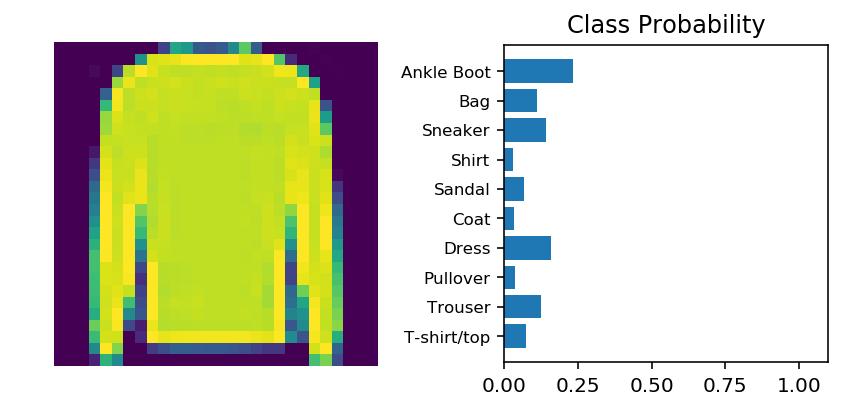

In [34]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import hillo


dataiter = iter(trainloader)
images, labels = dataiter.next()
img = images[63]

# TODO: Calculate the class probabilities (softmax) for img 
ps = torch.exp(model(img))

hillo.view_classify(img, ps, version='Fashion')